In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%config InlineBackend.figure_formats = ['retina']
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
info_patents = pd.read_pickle('../new_info_patents')
info_companies = pd.read_csv('./Data/new_info_companies.csv')

In [3]:
info_companies.drop(columns = [info_companies.columns.values[0]], inplace = True)

In [4]:
stat_columns = ["assignee_id", "assignee_lastknown_country", "assignee_total_num_patents", "assignee_total_num_inventors", "proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]
interest_info_companies = info_companies[stat_columns]

# OLS Regressions

## simplistic linear model without entity fixed effects

In [5]:
reg_companies = interest_info_companies[["assignee_total_num_patents", "assignee_total_num_inventors", "proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
model = sm.OLS(reg_companies.proportion_marked_patents, reg_companies.drop('proportion_marked_patents', axis = 1))
result = model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.110
Model:                                   OLS   Adj. R-squared:                  0.104
Method:                        Least Squares   F-statistic:                       nan
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):                nan
Time:                               12:55:16   Log-Likelihood:                -14.383
No. Observations:                       1695   AIC:                             50.77
Df Residuals:                           1684   BIC:                             110.6
Df Model:                                 10                                         
Covariance Type:                         hc0                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [20]:
vif = pd.DataFrame()
vif["variables"] = reg_companies.columns
vif["VIF"] = [variance_inflation_factor(reg_companies.values, i) for i in range(reg_companies.shape[1])]
vif

,variables,VIF
0,assignee_total_num_patents,8.318907
1,assignee_total_num_inventors,8.425058
2,proportion_marked_patents,1.123104
3,proportion_multi_ipc,1.126157
4,proportion_A_ipc,1.461959
5,proportion_B_ipc,1.381038
6,proportion_C_ipc,1.500389
7,proportion_D_ipc,1.075185
8,proportion_E_ipc,1.077322
9,proportion_F_ipc,1.192314


## work on non-linearity dependencies

### logarithmic dependencies for total number of patents/inventors

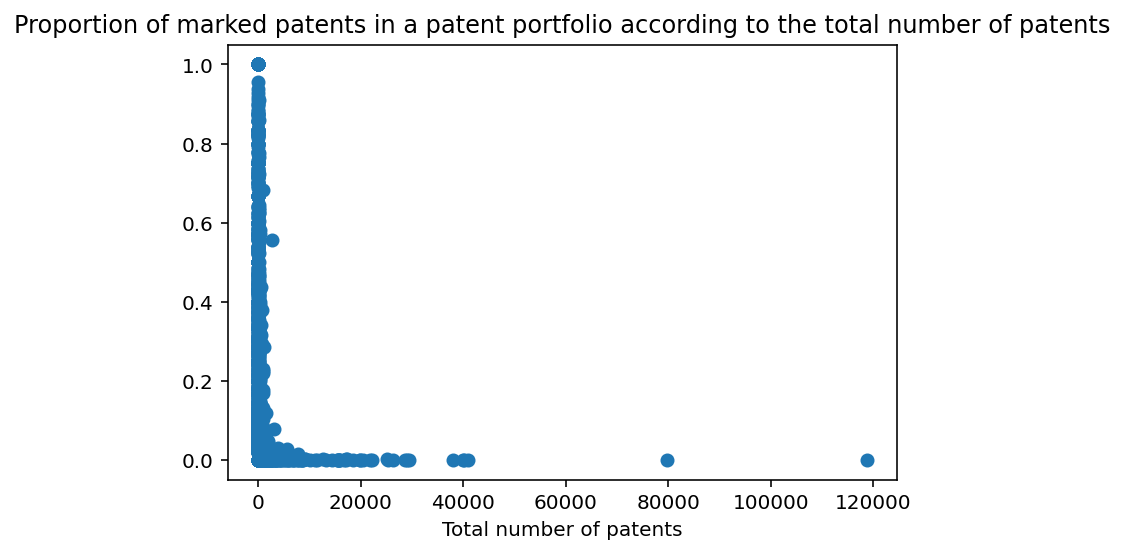

In [10]:
plt.scatter(reg_companies.assignee_total_num_patents, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of patents')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of patents')
plt.show()

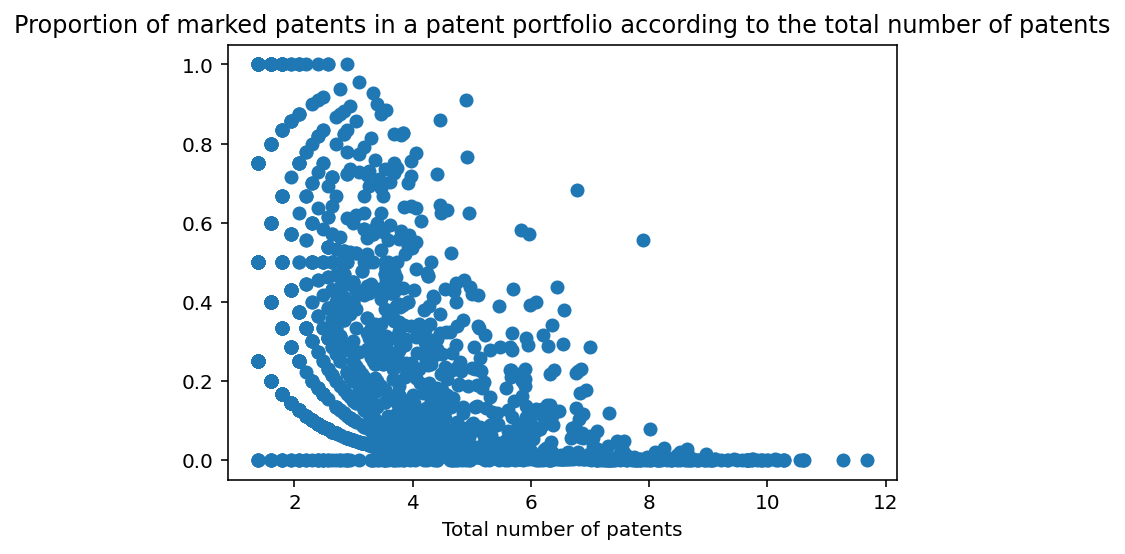

In [11]:
plt.scatter(np.log(reg_companies.assignee_total_num_patents), reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of patents')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of patents')
plt.show()

In [25]:
log_sqrt_companies = reg_companies[["proportion_marked_patents"]]
log_sqrt_companies["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_sqrt_companies["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_sqrt_companies= sm.add_constant(log_sqrt_companies)
log_patents_model = sm.OLS(log_sqrt_companies.proportion_marked_patents, log_sqrt_companies.drop('proportion_marked_patents', axis = 1))
result = log_patents_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.278
Model:                                   OLS   Adj. R-squared:                  0.277
Method:                        Least Squares   F-statistic:                     537.6
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          1.79e-181
Time:                               13:20:26   Log-Likelihood:                 163.35
No. Observations:                       1695   AIC:                            -320.7
Df Residuals:                           1692   BIC:                            -304.4
Df Model:                                  2                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

<ipython-input-25-7361081d2e00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_companies["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-25-7361081d2e00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_companies["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))


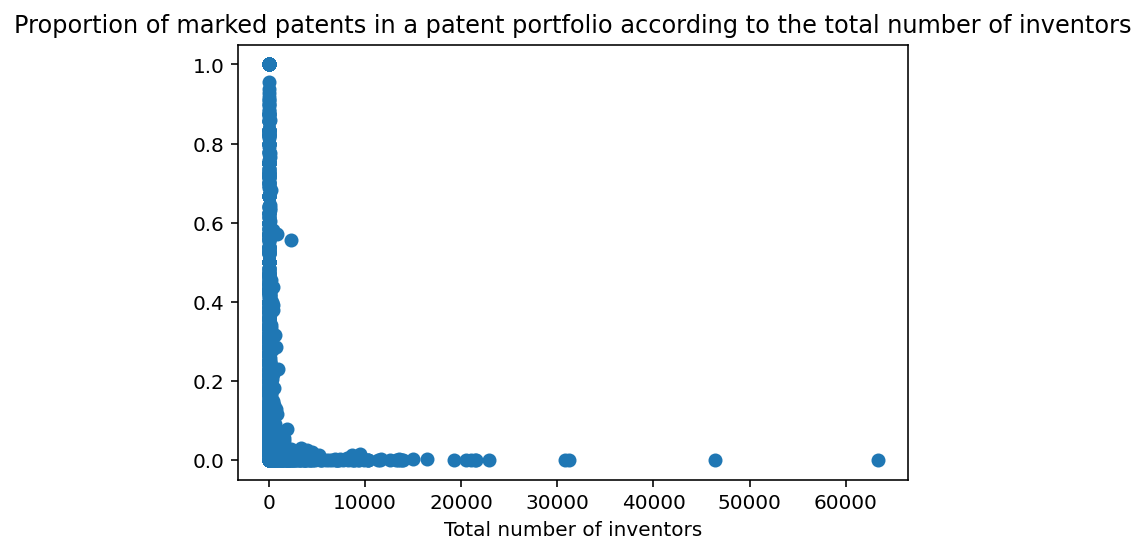

In [27]:
plt.scatter(reg_companies.assignee_total_num_inventors, reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Total number of inventors')
plt.title('Proportion of marked patents in a patent portfolio according to the total number of inventors')
plt.show()

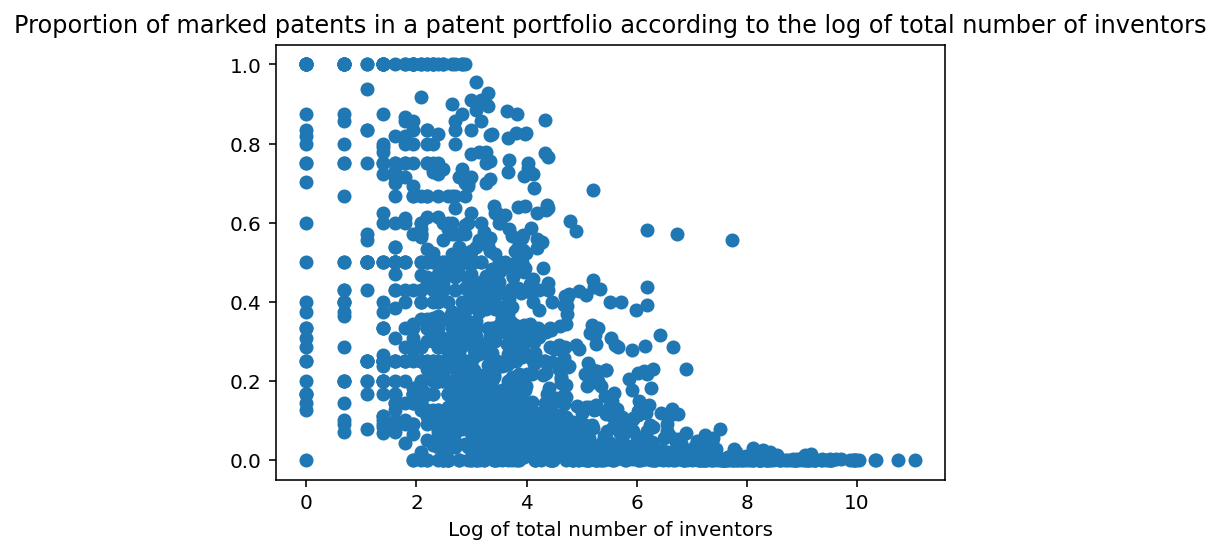

In [32]:
plt.scatter(np.log(reg_companies.assignee_total_num_inventors), reg_companies.proportion_marked_patents, marker = 'o')
plt.xlabel('Log of total number of inventors')
plt.title('Proportion of marked patents in a patent portfolio according to the log of total number of inventors')
plt.show()

In [35]:
log_sqrt_inventors = reg_companies[["proportion_marked_patents"]]
log_sqrt_inventors["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_sqrt_inventors["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))
log_sqrt_inventors= sm.add_constant(log_sqrt_inventors)
log_inventors_model = sm.OLS(log_sqrt_inventors.proportion_marked_patents, log_sqrt_inventors.drop('proportion_marked_patents', axis = 1))
result = log_inventors_model.fit(cov_type = 'hc0')
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.315
Model:                                   OLS   Adj. R-squared:                  0.314
Method:                        Least Squares   F-statistic:                     494.7
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          6.75e-170
Time:                               17:03:17   Log-Likelihood:                 208.04
No. Observations:                       1695   AIC:                            -410.1
Df Residuals:                           1692   BIC:                            -393.8
Df Model:                                  2                                         
Covariance Type:                         hc0                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

<ipython-input-35-bc13cf7aa05e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_inventors["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
<ipython-input-35-bc13cf7aa05e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_sqrt_inventors["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))


In [39]:
log_inventors_patents = reg_companies[["proportion_marked_patents"]]
log_inventors_patents["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_inventors_patents["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_inventors_patents["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_inventors_patents["sqrt_log_assignee_total_num_inventors"] = np.sqrt(np.log(reg_companies.assignee_total_num_inventors))
log_inventors_patents = sm.add_constant(log_inventors_patents)
simple_log_model = sm.OLS(log_inventors_patents.proportion_marked_patents, log_inventors_patents.drop('proportion_marked_patents', axis = 1))
result = simple_log_model.fit(cov_type = 'hc0')
print(result.summary())

<ipython-input-39-35f8eab008f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_inventors_patents["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
<ipython-input-39-35f8eab008f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_inventors_patents["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
<ipython-input-39-35f8eab008f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.339
Model:                                   OLS   Adj. R-squared:                  0.337
Method:                        Least Squares   F-statistic:                     299.9
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          5.34e-195
Time:                               17:11:40   Log-Likelihood:                 237.80
No. Observations:                       1695   AIC:                            -465.6
Df Residuals:                           1690   BIC:                            -438.4
Df Model:                                  4                                         
Covariance Type:                         hc0                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

sqrt_log_assignee_total_num_inventors is no longer relevant since its p-value is far greater than 0.05.

In [49]:
log_data = reg_companies[["proportion_marked_patents", "proportion_multi_ipc", "proportion_A_ipc", "proportion_B_ipc", "proportion_C_ipc", "proportion_D_ipc", "proportion_E_ipc", "proportion_F_ipc", "proportion_G_ipc", "proportion_H_ipc"]]
log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)
log_data["sqrt_log_assignee_total_num_patents"] = np.sqrt(np.log(reg_companies.assignee_total_num_patents))
log_data["log_assignee_total_num_inventors"] = np.log(reg_companies.assignee_total_num_inventors)
log_data = sm.add_constant(log_data)
log_model = sm.OLS(log_data.proportion_marked_patents, log_data.drop('proportion_marked_patents', axis = 1))
result = log_model.fit(cov_type = 'hc0')
print(result.summary())

<ipython-input-49-fcc67ab9139c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data["log_assignee_total_num_patents"] = np.log(reg_companies.assignee_total_num_patents)


                                OLS Regression Results                               
Dep. Variable:     proportion_marked_patents   R-squared:                       0.366
Model:                                   OLS   Adj. R-squared:                  0.362
Method:                        Least Squares   F-statistic:                     177.4
Date:                       Tue, 01 Jun 2021   Prob (F-statistic):          3.61e-288
Time:                               17:34:03   Log-Likelihood:                 274.10
No. Observations:                       1695   AIC:                            -524.2
Df Residuals:                           1683   BIC:                            -459.0
Df Model:                                 11                                         
Covariance Type:                         hc0                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------